In [1]:
%pylab inline
plt.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
from scipy.stats import pearsonr

In [ ]:
train = pd.read_csv('evo/train.csv')

In [ ]:
train.sample(5)

In [5]:
go_terms = [col for col in train.columns if  'go_' in col]

In [6]:
go_terms_df = train[go_terms]
go_term_on = go_terms_df.sum(axis = 0, skipna = True).fillna(0)

In [7]:
valig_go_terms = go_term_on.dropna().where(go_term_on > 100)

In [8]:
valig_go_terms = valig_go_terms.sort_values(ascending = False)#[0:50].index.tolist()

Text(0.5, 1.0, 'Go terms frequencies')

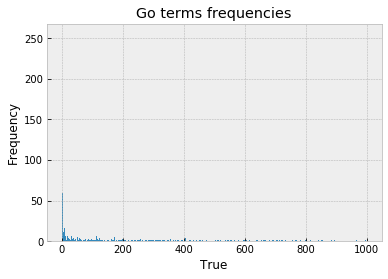

In [39]:

go_term_on.hist(bins=range(0, 1000))
plt.ylabel('Frequency')
plt.xlabel('True')
plt.title('Go terms frequencies')


In [9]:
most_frequest_go_terms = go_term_on.sort_values(ascending = False)[0:50].index.tolist()

In [10]:
features = ['A', 'Acidic', 'Aliphatic', 'Aromatic', 'Basic', 'C',
       'Charged', 'D', 'E', 'F', 'G', 'H', 'I', 'InclusionBodiesProbability',
       'K', 'L', 'M', 'N', 'Non-polar', 'P', 'Polar', 'Q', 'R', 'S', 'Small',
       'T', 'Tiny', 'V', 'W', 'Y', 'codone_usage', 'gc_std', 'kaks', 'length', 'localization', 'mol_w', 'pi', 'pseb_H1_l_1',
       'pseb_H1_l_10', 'pseb_H1_l_2', 'pseb_H1_l_3', 'pseb_H1_l_4',
       'pseb_H1_l_5', 'pseb_H1_l_6', 'pseb_H1_l_7', 'pseb_H1_l_8',
       'pseb_H1_l_9', 'pseb_H2_l_11', 'pseb_H2_l_12', 'pseb_H2_l_13',
       'pseb_H2_l_14', 'pseb_H2_l_15', 'pseb_H2_l_16', 'pseb_H2_l_17',
       'pseb_H2_l_18', 'pseb_H2_l_19', 'pseb_H2_l_20', 'relative_codone_usage',
       'repeated', 'tmlen']

/home/ubuntu/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


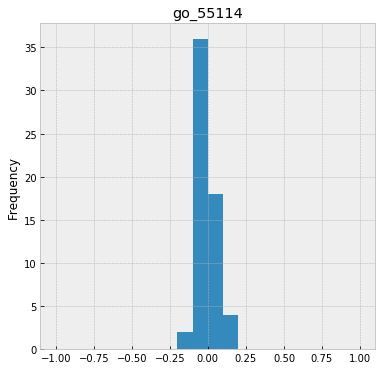

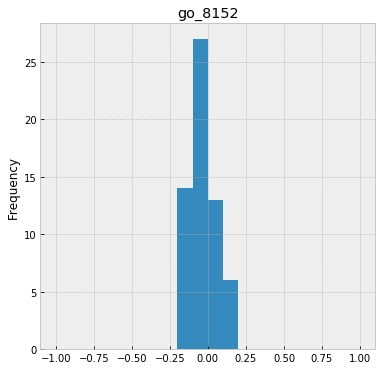

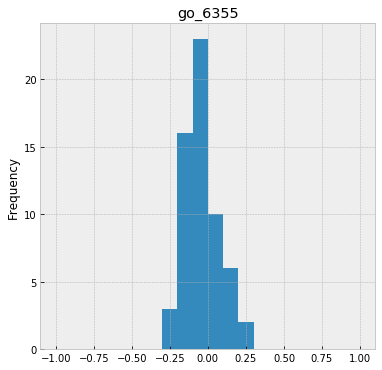

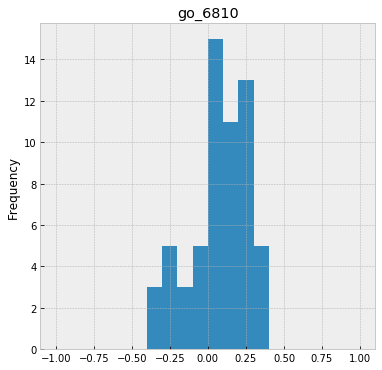

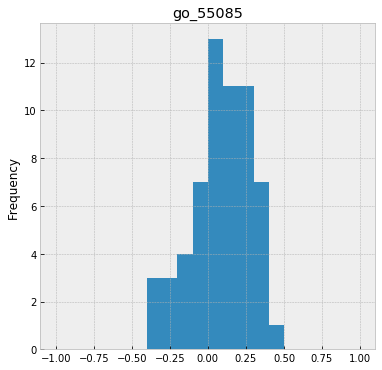

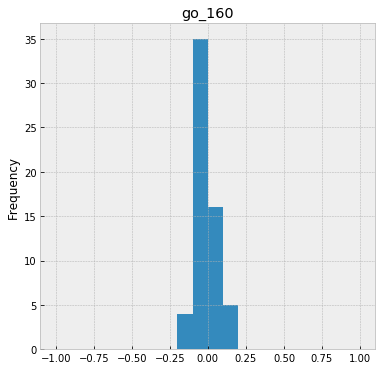

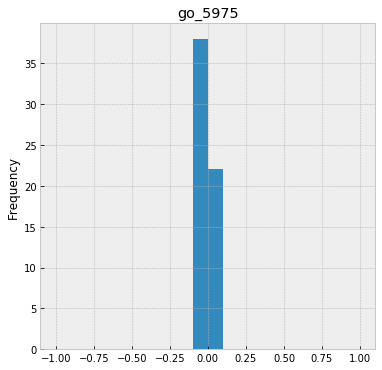

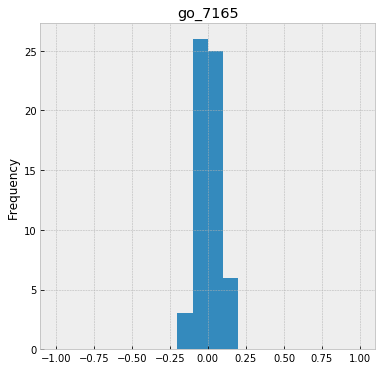

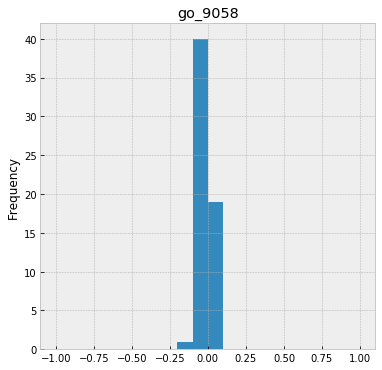

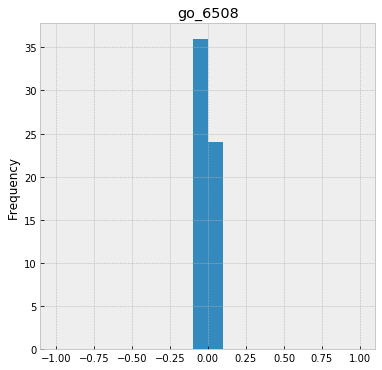

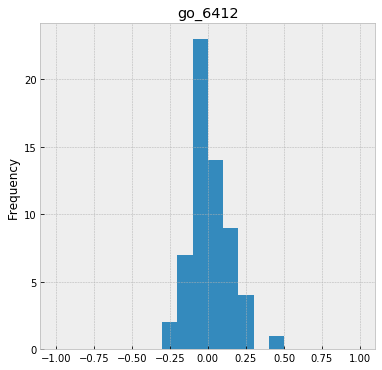

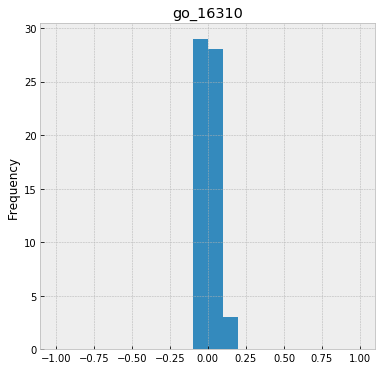

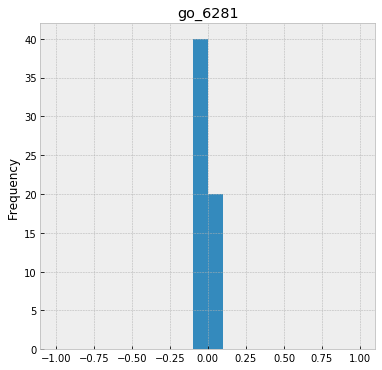

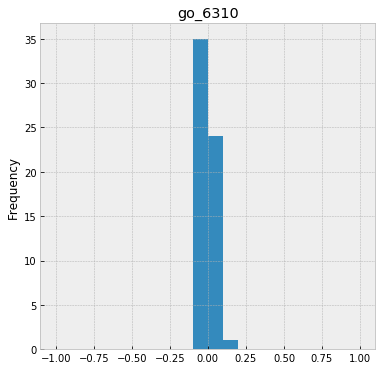

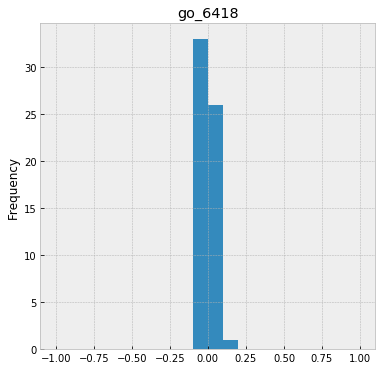

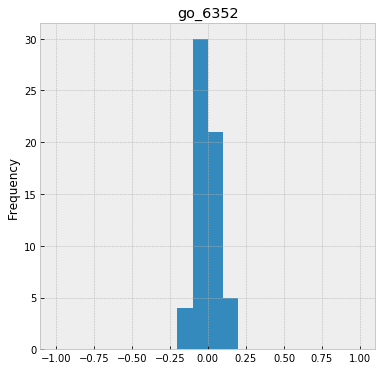

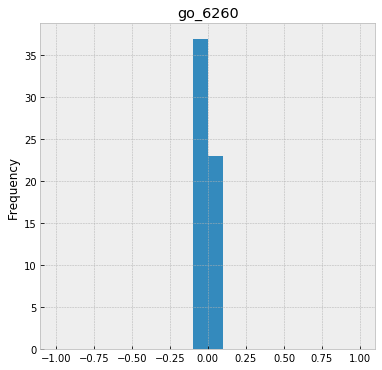

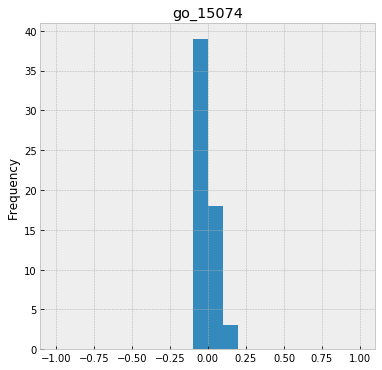

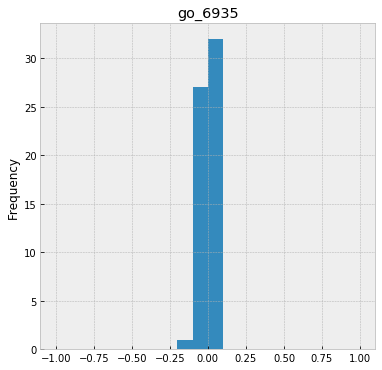

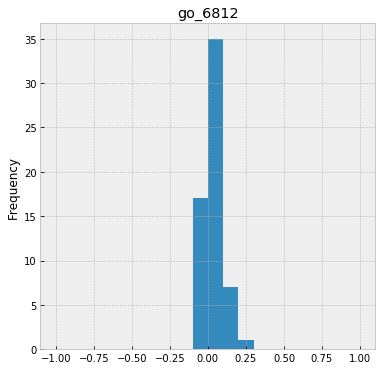

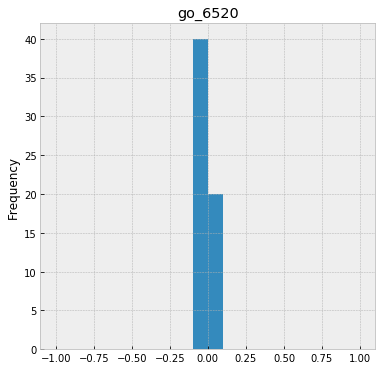

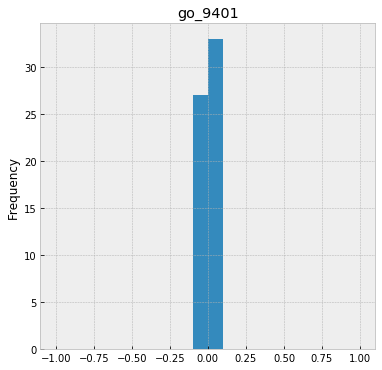

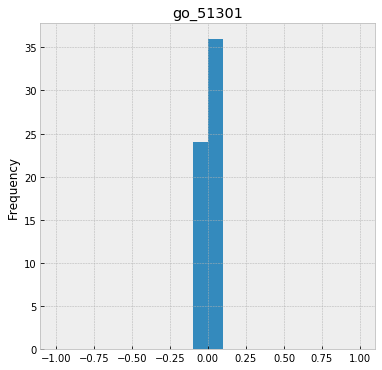

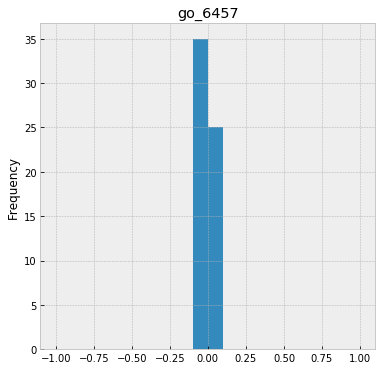

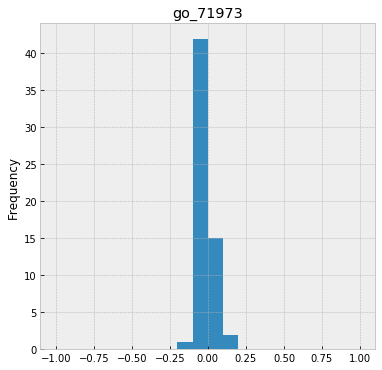

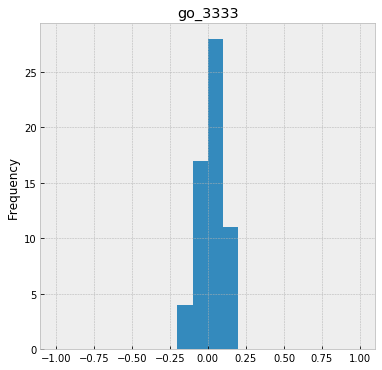

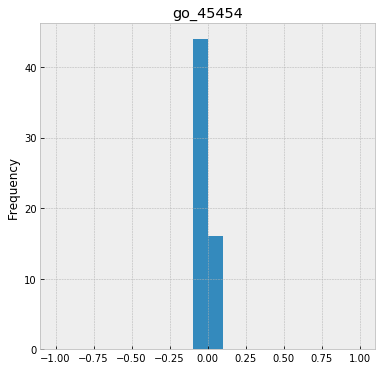

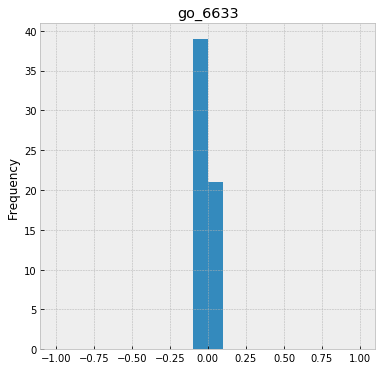

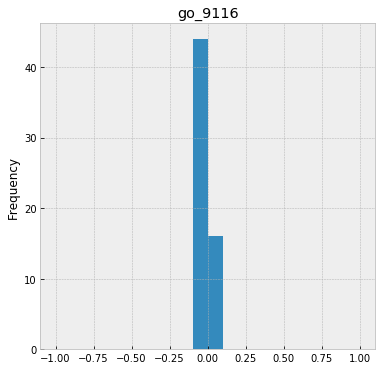

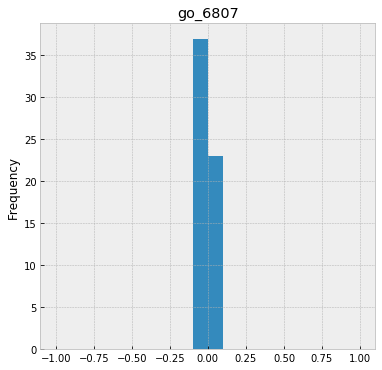

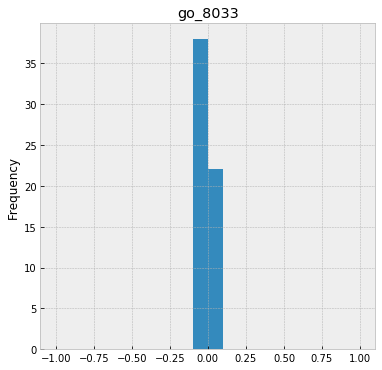

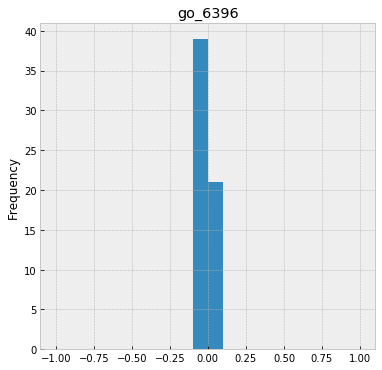

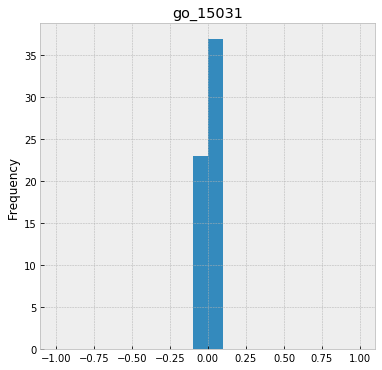

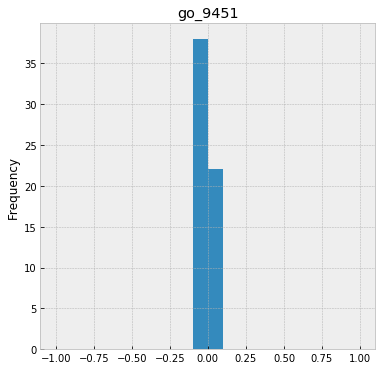

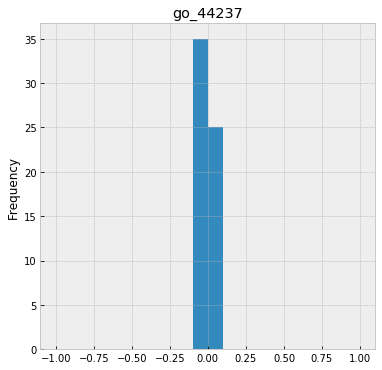

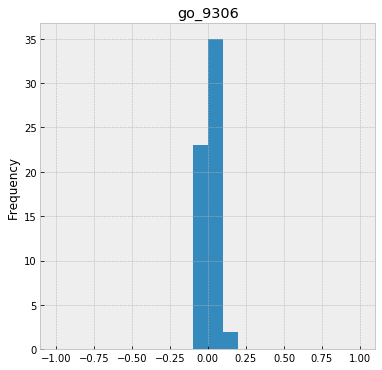

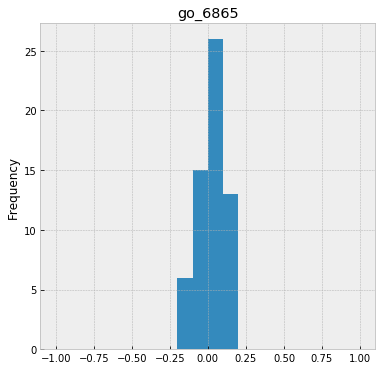

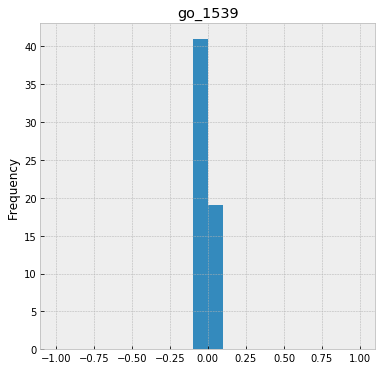

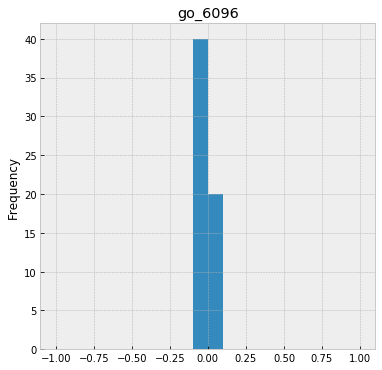

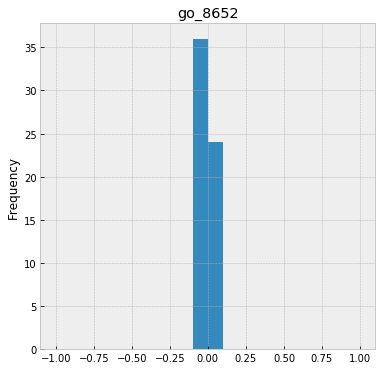

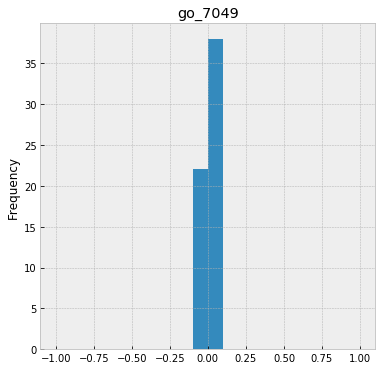

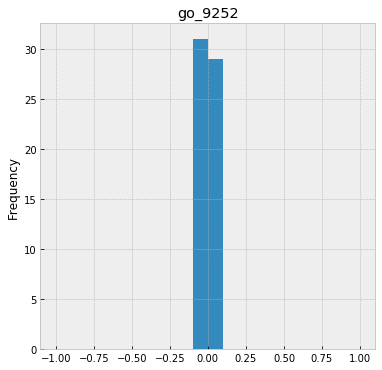

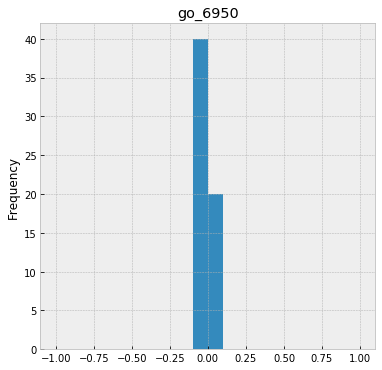

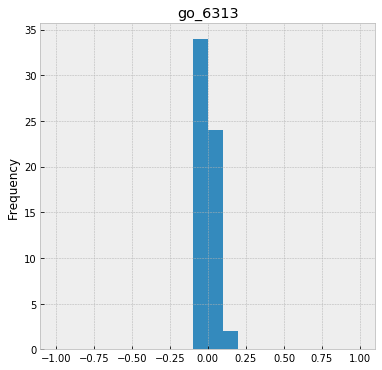

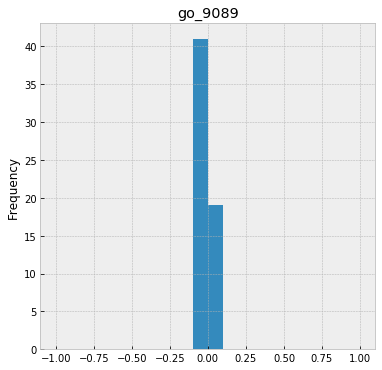

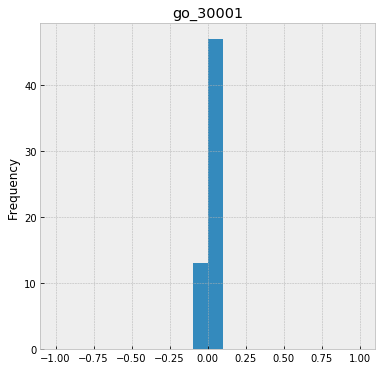

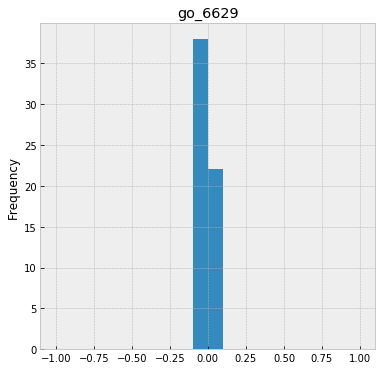

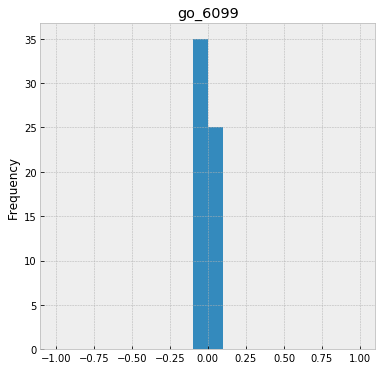

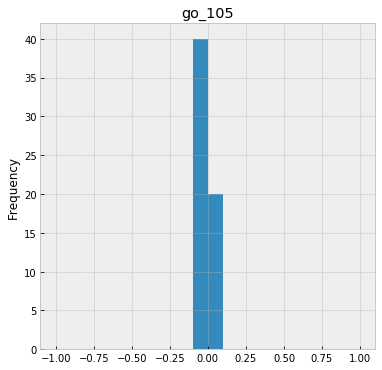

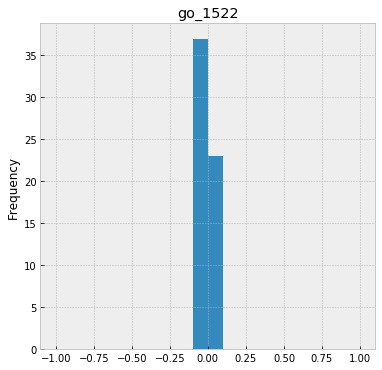

In [11]:
for go in most_frequest_go_terms:
    crs = {}

    for cl in features:
        cr, _ = pearsonr(train[cl], train[go])
        crs[cl] = cr

    crs = pd.Series(crs)
    plt.figure(figsize=(6,6))
    
    crs.plot(kind="hist", title=go, range=[-1, 1], bins=20, ax=plt.gca())

In [45]:
from sklearn.metrics import mutual_info_score
for go in most_frequest_go_terms:
    mis = {}
    #go ='go_55114'
    plt.figure(figsize=(6,6))

    for cl in features:
        qs = np.percentile(train[cl], q=(25, 50, 75))
        qz = np.digitize(train[cl], qs)
        mis[cl] = mutual_info_score( train[go], qz)

    mis = pd.Series(mis)
    plt.figure(figsize=(6,6))
    mis.plot(kind="hist", title=go, range=[-0.1, 0.1], bins=20, ax=plt.gca())
     

In [46]:
len(most_frequest_go_terms)

50

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, classification_report

aggr = None
for index, go_term in enumerate(most_frequest_go_terms):
    print(index)
    model = RandomForestClassifier(n_estimators=30, max_depth=5)
    model.fit(train.loc[:, features], train.loc[:, go_term])
    #imprts = pd.Series(model.feature_importances_, index=features, name="importance").sort_values(ascending=False)
    imprts = model.feature_importances_
    aggr = aggr if aggr is None else aggr + imprts    

0
1
2
3


In [ ]:
imprts = pd.Series(aggr, index=features, name="importance").sort_values(ascending=False)
plt.figure(figsize=(16,16))
imprts.plot()